# Gradient Descent Intro
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([0.056 , 0.3173, 0.5768, 0.9294, 0.0137, 0.9594, 0.7175, 0.8784, 0.0624, 0.6194, 0.6847,
       0.0139, 0.4222, 0.7595, 0.3157, 0.3823, 0.7699, 0.4867, 0.1596, 0.5308, 0.6814, 0.652 ,
       0.0062, 0.5643, 0.5006, 0.0804, 0.0673, 0.0328, 0.539 , 0.0986])

In [6]:
y

array([ 8.1679,  8.952 ,  9.7304, 10.7882,  8.0412, 10.8783, 10.1526, 10.6351,  8.1872,  9.8581,
       10.0542,  8.0416,  9.2666, 10.2785,  8.9471,  9.1468, 10.3097,  9.4601,  8.4788,  9.5924,
       10.0441,  9.9559,  8.0185,  9.6929,  9.5017,  8.2411,  8.2019,  8.0985,  9.6169,  8.2959])

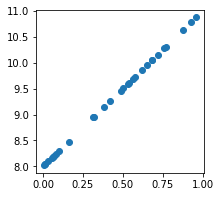

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.800623616590578

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani